<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Computer%20Vision/MNIST_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparing Data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


### Visualizing Random Image

In [3]:
import matplotlib.pyplot as plt
import random
def visualize_random_image(data):
  x,y = data
  index = random.randint(0,len(x))
  print(x[index].shape)
  plt.imshow(x[index],cmap = "gray")
  plt.title("Digit:{}".format(y[index]))
  plt.axis('off')

(28, 28)


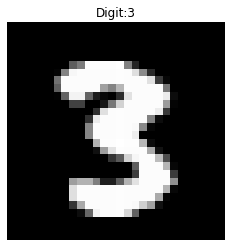

In [4]:
visualize_random_image((x_train,y_train))

In [5]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train/= 255
x_test/=255

In [30]:
len(x_train)

60000

In [31]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

## Model 0 : Simple CNN

In [8]:
from tensorflow.keras import layers

In [42]:
model_0 = tf.keras.Sequential([
  layers.Conv2D(filters = 32,kernel_size = (3,3),input_shape = (28,28,1),activation = "relu"),
  layers.Conv2D(filters = 32,kernel_size = (3,3),activation = "relu"),
  layers.Conv2D(32,3,activation = "relu"),
  layers.GlobalAveragePooling2D(),
  layers.Dropout(0.01),
  layers.Flatten(),
  layers.Dense(64),
  layers.Dense(10,activation = "softmax")
  ]
)

In [43]:
model_0.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [44]:
history_0 = model_0.fit(x_train,y_train,epochs = 12,validation_data = (x_test,y_test), batch_size=32)

Epoch 1/12
1875/1875 [==============================] - 13s 5ms/step - loss: 1.0331 - accuracy: 0.6428 - val_loss: 0.5361 - val_accuracy: 0.8302
Epoch 2/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4458 - accuracy: 0.8661 - val_loss: 0.2716 - val_accuracy: 0.9226
Epoch 3/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2976 - accuracy: 0.9103 - val_loss: 0.2005 - val_accuracy: 0.9424
Epoch 4/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2279 - accuracy: 0.9326 - val_loss: 0.1489 - val_accuracy: 0.9582
Epoch 5/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1893 - accuracy: 0.9432 - val_loss: 0.1286 - val_accuracy: 0.9627
Epoch 6/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1636 - accuracy: 0.9508 - val_loss: 0.1297 - val_accuracy: 0.9637
Epoch 7/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1466 - accuracy: 0.9554 - val_loss: 0.1034 - val_accuracy